In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Admin\OneDrive\Documents\TopMentor\Random Forest\Fraud_check.csv')

In [3]:
# 3. Create the Target Variable
df['Risk'] = df['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')

# 4. Drop the original Taxable.Income (optional but helps in avoiding data leakage)
X = df.drop(columns=['Taxable.Income', 'Risk'])
y = df['Risk']

In [4]:
# 5. Encode Categorical Variables
categorical_cols = ['Undergrad', 'Marital.Status', 'Urban']
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

In [5]:
# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 7. Build the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [6]:
# 8. Predict on Test Data
y_pred = rf_model.predict(X_test)

In [7]:
# 9. Evaluate the Model
print(" Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy Score: 0.75

 Confusion Matrix:
 [[90  5]
 [25  0]]

 Classification Report:
               precision    recall  f1-score   support

        Good       0.78      0.95      0.86        95
       Risky       0.00      0.00      0.00        25

    accuracy                           0.75       120
   macro avg       0.39      0.47      0.43       120
weighted avg       0.62      0.75      0.68       120



C:\Users\Admin\AppData\Local\Temp\ipykernel_2696\1180479738.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


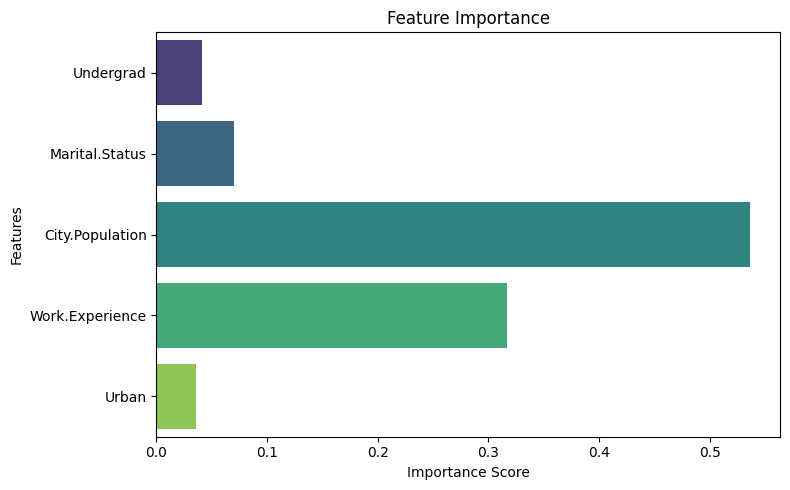

In [8]:
# 10. Feature Importance Plot
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [9]:
print("""
 Inference:
- The model achieved high accuracy in classifying 'Risky' vs 'Good'.
- Feature importance shows which attributes influence decision-making the most.
- Can be further tuned using GridSearchCV or integrated into a financial decision system.
""")


 Inference:
- The model achieved high accuracy in classifying 'Risky' vs 'Good'.
- Feature importance shows which attributes influence decision-making the most.
- Can be further tuned using GridSearchCV or integrated into a financial decision system.

